Exemplo de como o gradiente descentende estocástico pode ajudar no fit de uma função arbritária.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
matplotlib.rcParams['figure.dpi']=300

Função não linear parametrizada:

\begin{equation}
f(x) = \frac{\theta_1}{(x-\theta_2)^2+1}
\end{equation}

In [3]:
def f(theta,x):
  """
  Definição da função não linear parametrizada
  theta = parametros
  x = valores de input (pode ser uma array)
  """
  return( theta[0]/((x-theta[1])**2 +1) )

Grafiente da função em relação aos parametros:

\begin{equation}
f_{\theta_1}(x) = \frac{1}{(x-\theta_2)^2 +1}
\\
\\
f_{\theta_2}(x) = \frac{2\theta_1(x-\theta_2)}{((x-\theta_2)^2+1)^2}
\end{equation}



In [4]:
def f_grad(theta,x):
  """
  Retorna o gradiente da função em relação aos parametros
  shape: [len(theta), len(x)]
  """
  return(np.array([
                   1/((x-theta[1])**2+1),
                   2*theta[0]*(x-theta[1])/((x-theta[1])**2+1)**2
  ]))

In [5]:
#definir a função verdadeira a ser parametrizada
def true_f(x):
  return( 3.5/((x-0.8)**2+1) )

In [6]:
#gerar amostras randomicas para x
def samples(nsamples, width=2):
  return(width*np.random.randn(nsamples))

In [7]:
#Media da função objetivo para o um grid de 2 parametros
def get_avg_cost(theta0,theta1,nsamples):
  n0 = len(theta0)
  n1 = len(theta1)
  C = np.zeros([n0,n1])
  for i in range(n0):
    for j in range(n1):
      theta = np.array([theta0[i],theta1[j]])
      x = samples(nsamples)
      C[i,j] = 0.5*np.average((f(theta,x)-true_f(x))**2)
  return(C)

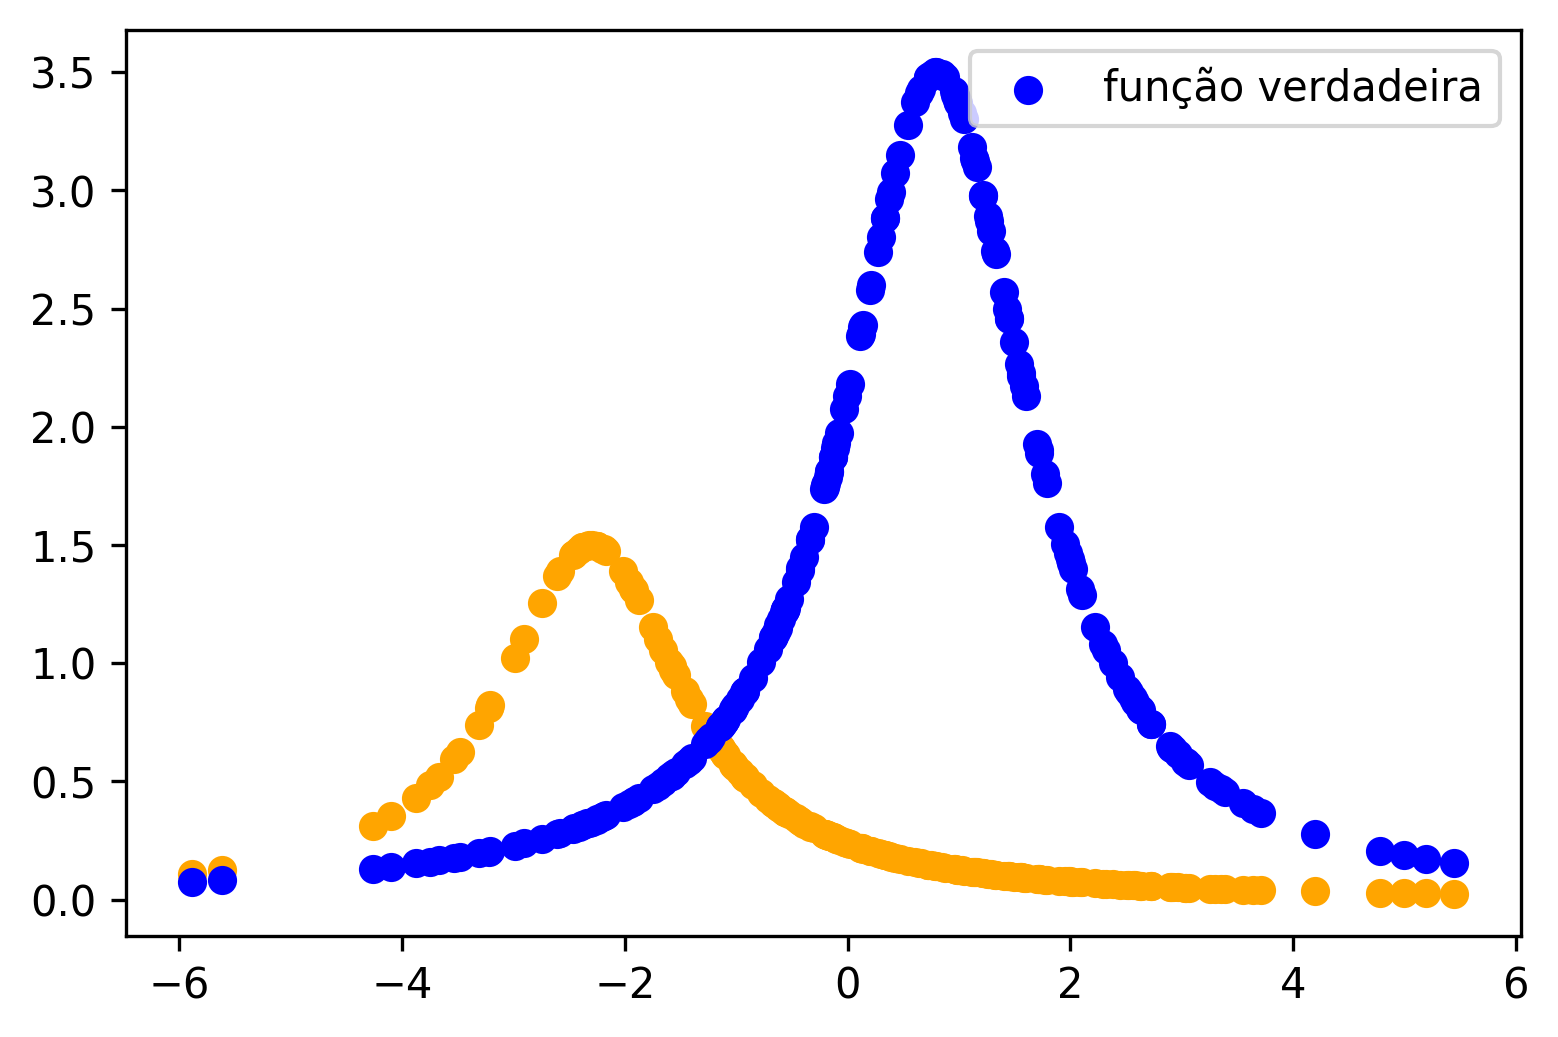

In [8]:
#Pegando valores arbitrários como ponto inicial
theta = np.array([1.5, -2.3])

x= samples(200)
#Visualização
plt.scatter(x, f(theta,x), color='orange')
plt.scatter(x,true_f(x), color='blue', label='função verdadeira')
plt.legend()
plt.show()

In [9]:
#calculando a media da função objetivo
theta0 = np.linspace(-3,6,100)
theta1 = np.linspace(-2,3,100)

C = get_avg_cost(theta0,theta1,10**4)

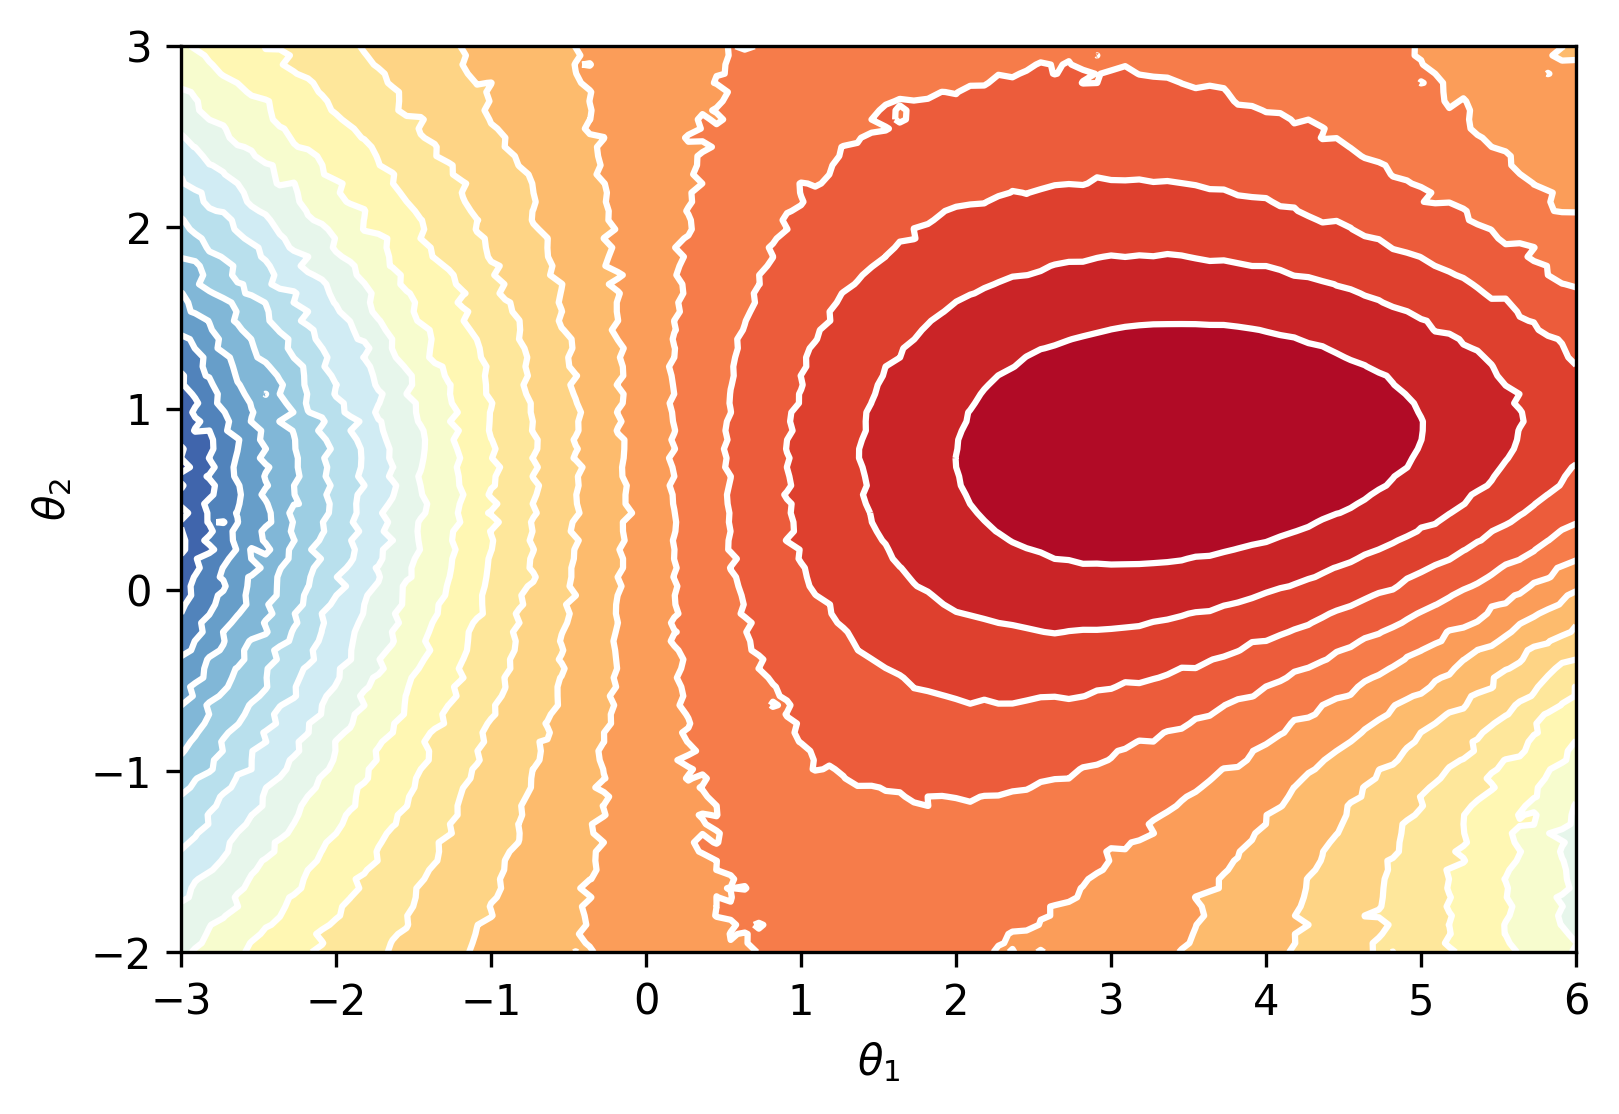

In [10]:
nlevels = 20
X,Y = np.meshgrid(theta0,theta1,indexing='ij')
plt.contourf(X,Y,C,nlevels,cmap='RdYlBu')
plt.contour(X,Y,C,nlevels,colors='white')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.show()

In [11]:
# Vamos utilizar o gradiente descentendete: 
# 1) para cada passo, vamos plotar a funçao verdadeira vs função parametrizada
# 2) para cada passo, plotar a localização dos parametros sobre a media da função objetivo
from IPython.display import clear_output
from time import sleep

In [15]:
# tomando valores arbitrários para os parâmetros
theta = np.array([-2.,-1.])

#'taxa de aprendizado', passo do gradiente descendente
eta = 0.5
#numero de amostras usadas
nsamples = 20

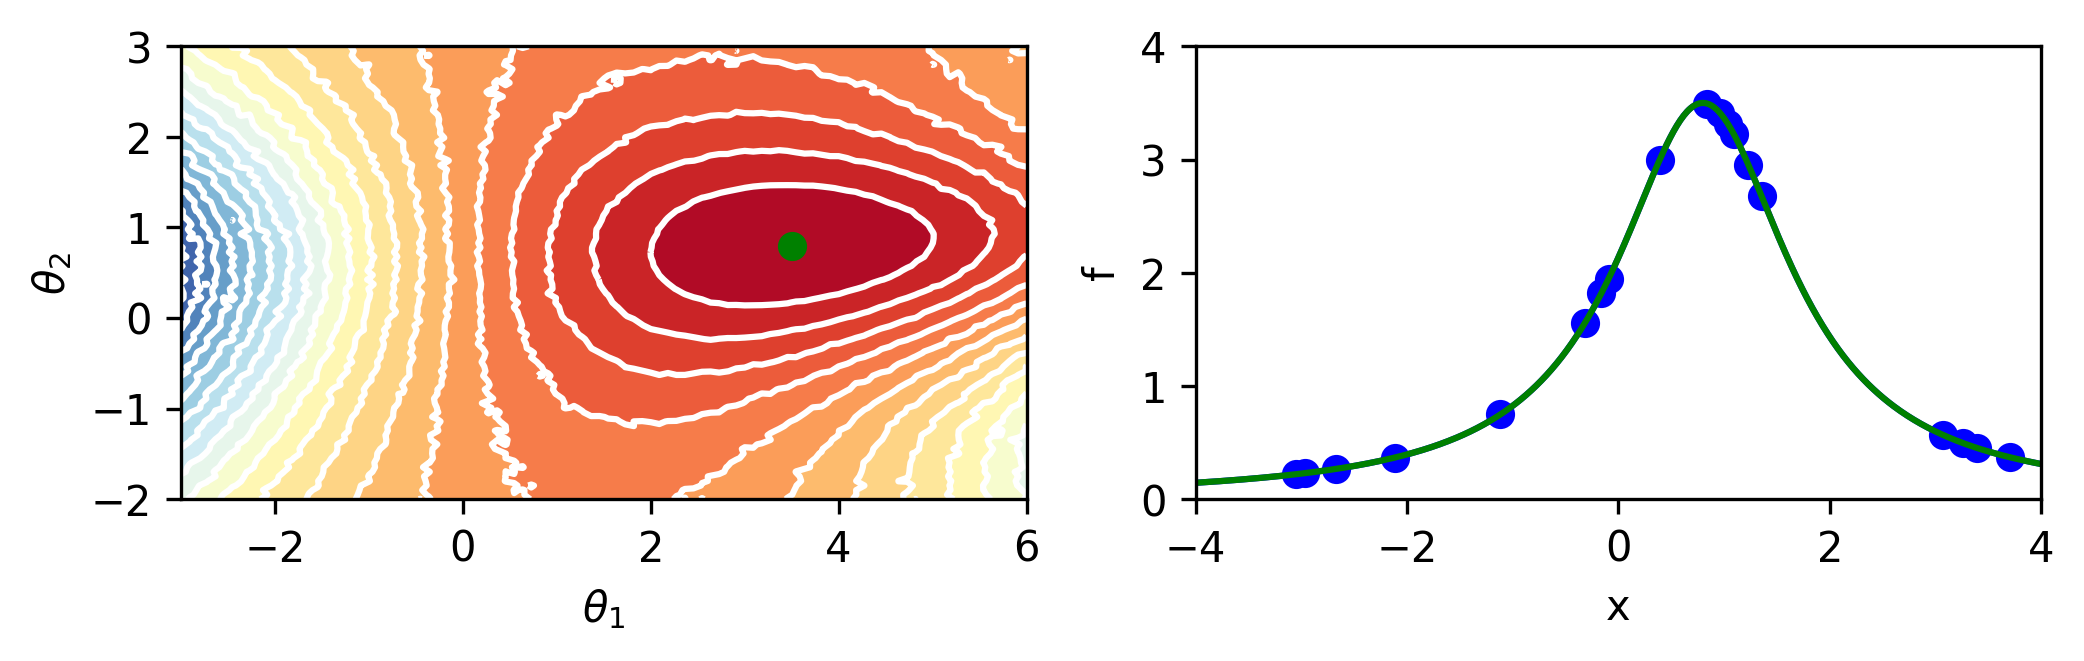

Theta_1=  3.4996281641699944
Theta_2=  0.8000348170440449


In [16]:
x_sweep = np.linspace(-4,4,500)

#gerar valores aleatorios
x = samples(nsamples)
#desvio da função verdadeira
deviation = f(theta,x) - true_f(x)

while( all(i > 10**(-10) for i in deviation**2) ):
  #passo do gradiente descentente
  theta -= eta*np.average(deviation[None,:]*f_grad(theta,x),axis=1)

    
  #vamos Plotar os resultados
  #função verdadeira = azul
  #função parametrizada = verde
  #pontos = valores randomicos onde a função verdadeira é calculada

  clear_output(wait=True)
  fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(8,2))

  nlevels = 20
  ax[0].contourf(X,Y,C,nlevels,cmap='RdYlBu')
  ax[0].contour(X,Y,C,nlevels,colors='white')
  ax[0].scatter([theta[0]], [theta[1]], color='green')
###
  ax[0].set_xlim(theta0[0],theta0[-1])
  ax[0].set_ylim(theta1[0],theta1[-1])
  ax[0].set_xlabel(r'$\theta_1$')
  ax[0].set_ylabel(r'$\theta_2$')
###
###
  ax[1].plot(x_sweep,true_f(x_sweep), color='blue')
  ax[1].scatter(x,true_f(x), color='blue')
  ax[1].plot(x_sweep,f(theta,x_sweep),color='green')
###
  ax[1].set_xlim(np.min(x_sweep), np.max(x_sweep))
  ax[1].set_ylim(0., 4.)
  ax[1].set_xlabel('x')
  ax[1].set_ylabel('f')
## 
  plt.show()
  sleep(0.1)

 #Novos valores pra o loop
 #gerar valores aleatorios
  x = samples(nsamples)
  #desvio da função verdadeira
  deviation = f(theta,x) - true_f(x)

print('Theta_1= ', theta[0]  )
print('Theta_2= ', theta[1])